<a href="https://colab.research.google.com/github/abhikr11/Energy_Drink_Market_Analysis/blob/main/F%26B_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Load Data**

In [ ]:
path = '/content/drive/MyDrive/DataScience/Projects/Data Analysis/F&B_Insights/Dataset'

In [ ]:
#load respondents dataset
respondents_df = pd.read_csv(path + '/dim_respondents.csv')

In [ ]:
#load city dataset
cities_df = pd.read_csv(path + '/dim_cities.csv')

In [ ]:
#load response dataset
responses_df = pd.read_csv(path + '/fact_survey_responses.csv')

**Data Dictionary**

Column Description for respondents_df:
-------------------------------------------------------

* Respondent_ID: This column represents the unique identifier assigned to each respondent in the survey.

* Name: This column represents the name of the respondent who participated in the survey.

* Age_Group: This column represents the categorized age group of the respondent. Age groups (15-18, 19-30, 31-45,46-65,65+)

* Gender: This column represents the gender of the respondent. (Male, Female, Non-binary)

* City_ID: This column represents the ID of the city where the respondent is located.

Column Description for dim_cities:
----------------------------------------------
* City_ID: This column represents the ID of the city.

* City: This column represents name of the city where the respondent is located. ("Delhi","Mumbai", "Bangalore","Chennai", "Kolkata","Hyderabad", "Ahmedabad","Pune","Jaipur", "Lucknow")

* Tier: This column represents the tier category of the city

In [ ]:
#first 5 rows of respondents
respondents_df.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [ ]:
#basic information
respondents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [ ]:
# cities dataframe
cities_df

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2
5,CT116,Hyderabad,Tier 1
6,CT117,Ahmedabad,Tier 2
7,CT118,Pune,Tier 2
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


In [ ]:
#basic information
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City_ID  10 non-null     object
 1   City     10 non-null     object
 2   Tier     10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [ ]:
#display all columns
pd.set_option('display.max_columns', None)

In [ ]:
#first 5 rows of survey responses
responses_df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [ ]:
#basic information
responses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [ ]:
#description of survey response dataset
responses_df.describe(include='all')

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
count,10000.00000,10000.00000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,NaN,NaN,5,4,5,2,3,4,2,NaN,5,7,5,5,4,2,3,5,5,3,4,5,5
top,NaN,NaN,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Neutral,Effective,No,NaN,Not available locally,Cola-Coka,Brand reputation,Reduced sugar content,Caffeine,Yes,Yes,Online ads,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
freq,NaN,NaN,3491,3409,3574,5553,5974,2909,5119,NaN,2431,2538,2652,2995,3896,6045,4983,4020,3984,4023,4288,4494,4494
mean,108000.50000,125030.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.281900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2886.89568,2886.89568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.239752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,103001.00000,120031.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,105500.75000,122530.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,108000.50000,125030.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,110500.25000,127530.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning & Transformation**

In [ ]:
#merge respondents and cities dataset
df1 = respondents_df.merge(cities_df, how = 'left', on = 'City_ID')

In [ ]:
df1

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,120032,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,120033,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,120034,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,120035,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2
...,...,...,...,...,...,...,...
9995,130026,Arnav Kale,31-45,Male,CT112,Mumbai,Tier 1
9996,130027,Yuvraj Agrawal,15-18,Male,CT113,Bangalore,Tier 1
9997,130028,Vardaniya Chauhan,31-45,Male,CT114,Chennai,Tier 1
9998,130029,Jayan Goyal,19-30,Male,CT113,Bangalore,Tier 1


In [ ]:
#merge all three dataset
df = pd.merge(left=responses_df,
              right = df1,
              how='left',
              on = 'Respondent_ID')

In [ ]:
df

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,Health concerns,Cola-Coka,Brand reputation,Other,Caffeine,No,No,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late,Arnav Kale,31-45,Male,CT112,Mumbai,Tier 1
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,Not available locally,Gangster,Effectiveness,More natural ingredients,Caffeine,No,No,TV commercials,Other,Yes,50-99,Online retailers,Social outings/parties,Yuvraj Agrawal,15-18,Male,CT113,Bangalore,Tier 1
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,Other,Blue Bull,Availability,Other,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise,Vardaniya Chauhan,31-45,Male,CT114,Chennai,Tier 1
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,Unfamiliar with the brand,Blue Bull,Taste/flavor preference,Other,Sugar,Yes,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late,Jayan Goyal,19-30,Male,CT113,Bangalore,Tier 1


In [ ]:
#basic information of merged datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [ ]:
#check null values in dataset
df.isnull().sum()

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
Name                              0
Age                               0
Gender                            0
City_ID                           0
City                        

In [ ]:
#check duplicate values
df.duplicated().sum()

0

In [ ]:
#define function to plot pie chart so that we don't have to write code again and again

def plot_pie(data,labels,chart_title):
  '''
  Function to plot pie chart
  '''
  plt.figure(figsize = (5,5))              #define figure size
  plt.pie(x = data,
          labels = labels,                 #show category labels
          explode=[0.07]* len(data),
          autopct='%.2f%%',
          shadow=True)
  plt.title(chart_title)
  plt.show()                              #show plot

**Primary Insights**

# **1. Demographic Insights**

**a. Who prefers energy drink more? (male/female/non-binary?)**

In [ ]:
#value count on Gender column
respondents_df.Gender.value_counts()

Male          6038
Female        3455
Non-binary     507
Name: Gender, dtype: int64

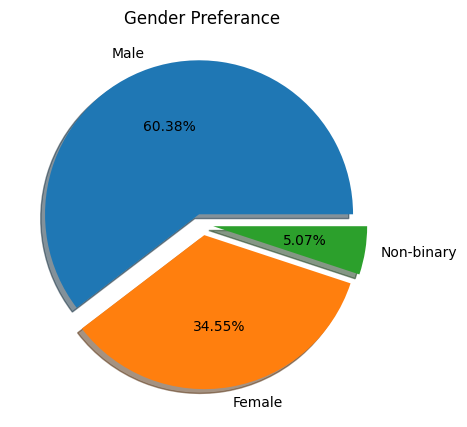

In [ ]:
#plot pie
plot_pie(respondents_df.Gender.value_counts(),list(respondents_df.Gender.value_counts().index), 'Gender Preferance')

**b. Which age group prefers energy drinks more?**

In [ ]:
percent_age_group = respondents_df.Age.value_counts()/10000 *100
percent_age_group

19-30    55.20
31-45    23.76
15-18    14.88
46-65     4.26
65+       1.90
Name: Age, dtype: float64

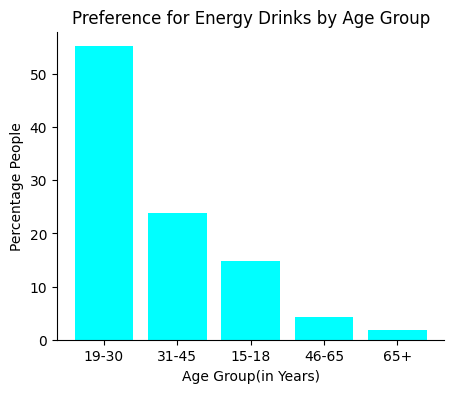

In [ ]:
#plot bar chart
plt.figure(figsize=(5,4))
plt.bar(percent_age_group.index,percent_age_group.values,color='cyan')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Age Group(in Years)')
plt.ylabel('Percentage People')
plt.title('Preference for Energy Drinks by Age Group')
plt.show()

**c. Which type of marketing reaches the most Youth (15-30)?**

In [ ]:
#choose only those rows which have age between 15-30 and value count on marketing channels
youth_markt = df[(df.Age =='15-18') | (df.Age == '19-30')].Marketing_channels.value_counts()
percent_youth_markt = youth_markt/ sum(youth_markt) *100
percent_youth_markt

Online ads            48.130708
TV commercials        25.470890
Other                 10.017123
Outdoor billboards    10.017123
Print media            6.364155
Name: Marketing_channels, dtype: float64

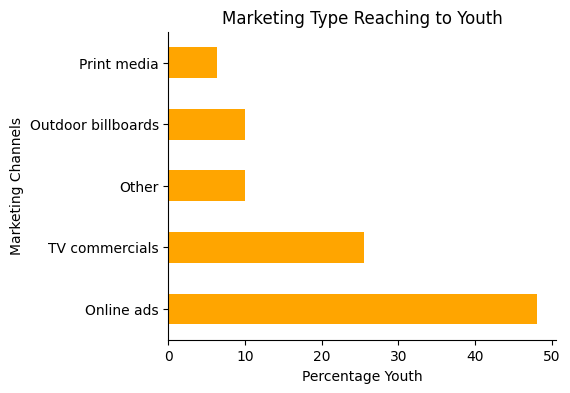

In [ ]:
#plot bar chart
plt.figure(figsize=(5,4))
percent_youth_markt.plot(kind='barh',color='orange')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Percentage Youth')
plt.ylabel('Marketing Channels')
plt.title('Marketing Type Reaching to Youth')
plt.show()

**d. Which city Code X is more famous?**

In [ ]:
city_count=df.groupby('Heard_before').City.value_counts().unstack()
#taking transpose
t_city_count=city_count.T

In [ ]:
#add total cont
t_city_count['total_count']= t_city_count['No'] + t_city_count['Yes']
#convert to percentage
t_city_count['Yes']= t_city_count.apply(lambda x:x.Yes/x.total_count *100, axis=1)
t_city_count['No']= t_city_count.apply(lambda x:x.No/x.total_count *100, axis=1)

In [ ]:
t_city_count

Heard_before,No,Yes,total_count
City,,,
Ahmedabad,54.605263,45.394737,456
Bangalore,59.052334,40.947666,2828
Chennai,60.298826,39.701174,937
Delhi,37.762238,62.237762,429
Hyderabad,60.283688,39.716312,1833
Jaipur,60.000000,40.000000,360
Kolkata,62.897527,37.102473,566
Lucknow,51.428571,48.571429,175
Mumbai,40.463576,59.536424,1510


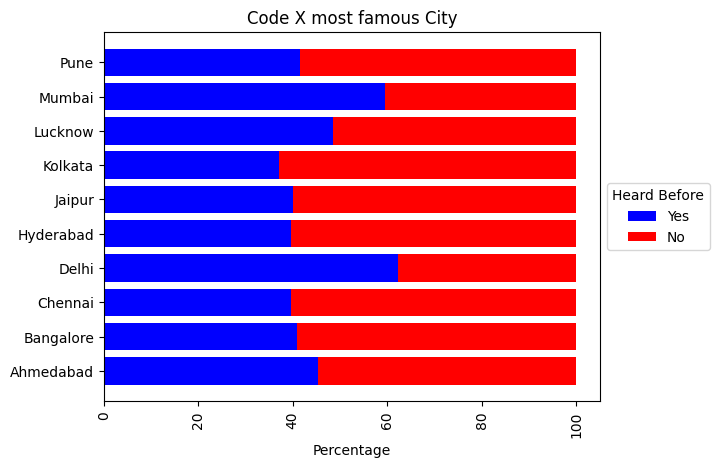

In [ ]:
# Plotting the stacked bars
plt.barh(t_city_count.index, t_city_count['Yes'], label='Yes', color='b')
plt.barh(t_city_count.index, t_city_count['No'], label='No', color='r', left=t_city_count['Yes'])
plt.legend(title='Heard Before', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.xlabel('Percentage')
plt.title('Code X most famous City')
plt.show()

# **2. Consumer Preferences:**

**a. What are the preferred ingredients of energy drinks among respondents?**

In [ ]:
responses_df.Ingredients_expected.value_counts()

Caffeine    3896
Vitamins    2534
Sugar       2017
Guarana     1553
Name: Ingredients_expected, dtype: int64

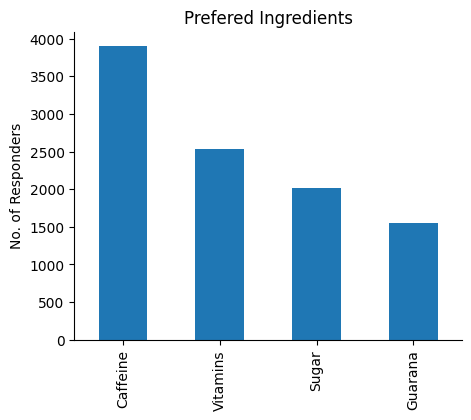

In [ ]:
plt.figure(figsize=(5,4))
responses_df.Ingredients_expected.value_counts().plot(kind='bar')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('No. of Responders')
plt.title('Prefered Ingredients')
plt.show()

**b. What packaging preferences do respondents have for energy drinks?**

In [ ]:
responses_df.Packaging_preference.value_counts()

Compact and portable cans    3984
Innovative bottle design     3047
Collectible packaging        1501
Eco-friendly design           983
Other                         485
Name: Packaging_preference, dtype: int64

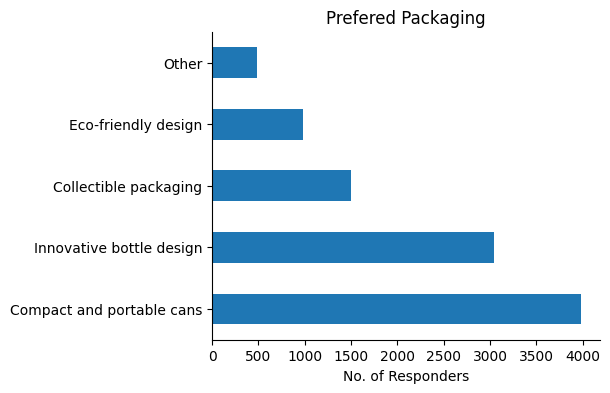

In [ ]:
plt.figure(figsize=(5,4))
responses_df.Packaging_preference.value_counts().plot(kind='barh')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('No. of Responders')
plt.title('Prefered Packaging')
plt.show()

# **3. Competition Analysis:**

**a. Who are the current market leaders?**

In [ ]:
responses_df.Current_brands.value_counts()

Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: Current_brands, dtype: int64

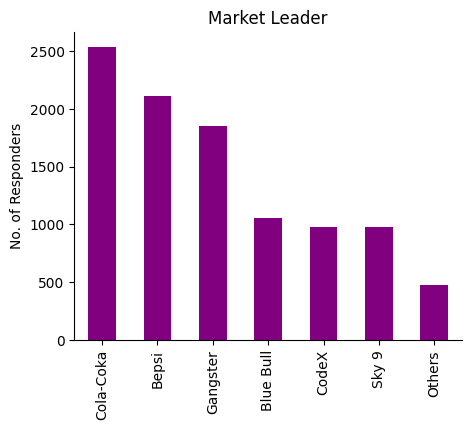

In [ ]:
plt.figure(figsize=(5,4))
responses_df.Current_brands.value_counts().plot(kind='bar', color='purple')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('No. of Responders')
plt.title('Market Leader')
plt.show()

**b. What are the primary reasons consumers prefer those brands over ours?**

In [ ]:
responses_df.Heard_before.value_counts()

No     5553
Yes    4447
Name: Heard_before, dtype: int64

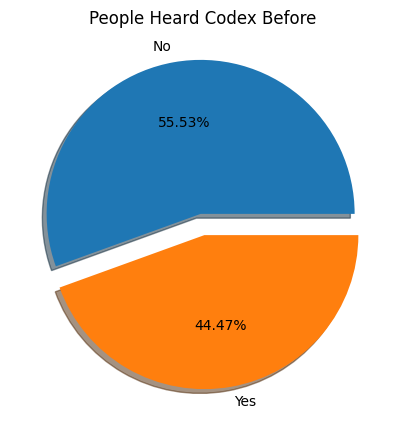

In [ ]:
plot_pie(responses_df.Heard_before.value_counts(),list(responses_df.Heard_before.value_counts().index),'People Heard Codex Before')

In [ ]:
#Reason for choosing other brand
df[~(df['Current_brands']=='CodeX')].Reasons_for_choosing_brands.value_counts()

Brand reputation           2393
Taste/flavor preference    1829
Availability               1715
Effectiveness              1572
Other                      1511
Name: Reasons_for_choosing_brands, dtype: int64

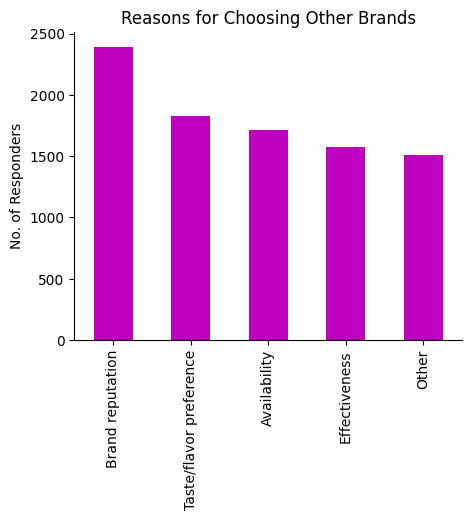

In [ ]:
plt.figure(figsize=(5,4))
df[~(df['Current_brands']=='CodeX')].Reasons_for_choosing_brands.value_counts().plot(kind='bar', color='m')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('No. of Responders')
plt.title('Reasons for Choosing Other Brands')
plt.show()

In [ ]:
responses_df.Reasons_preventing_trying.value_counts()

Not available locally              2431
Health concerns                    2258
Not interested in energy drinks    2193
Unfamiliar with the brand          1850
Other                              1268
Name: Reasons_preventing_trying, dtype: int64

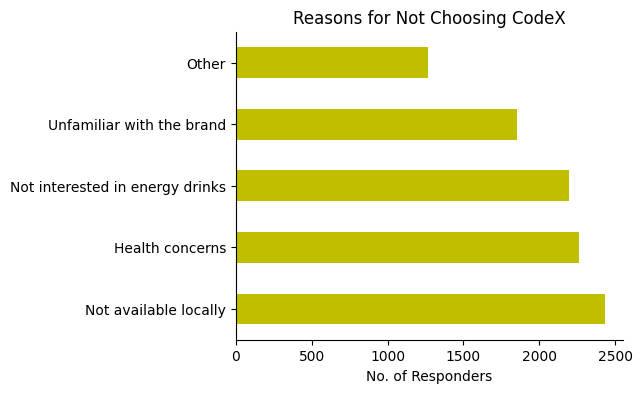

In [ ]:
plt.figure(figsize=(5,4))
responses_df.Reasons_preventing_trying.value_counts().plot(kind='barh', color='y')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('No. of Responders')
plt.title('Reasons for Not Choosing CodeX')
plt.show()

# **4. Marketing Channels and Brand Awareness:**

**a. Which marketing channel can be used to reach more customers?**

In [ ]:
responses_df.Marketing_channels.value_counts()

Online ads            4020
TV commercials        2688
Outdoor billboards    1226
Other                 1225
Print media            841
Name: Marketing_channels, dtype: int64

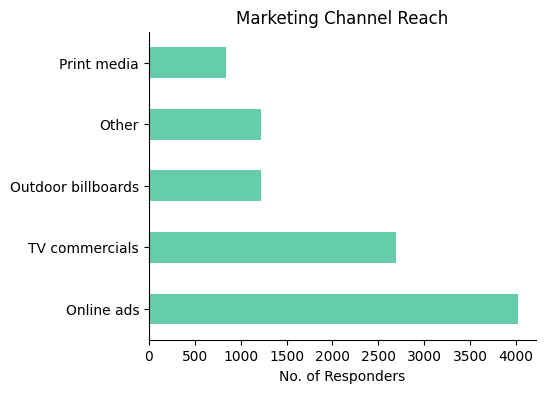

In [ ]:
plt.figure(figsize=(5,4))
responses_df.Marketing_channels.value_counts().plot(kind='barh', color='mediumaquamarine')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('No. of Responders')
plt.title('Marketing Channel Reach')
plt.show()

**b. How effective are different marketing strategies and channels in reaching our
customers?**

In [ ]:
df.head(2)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2


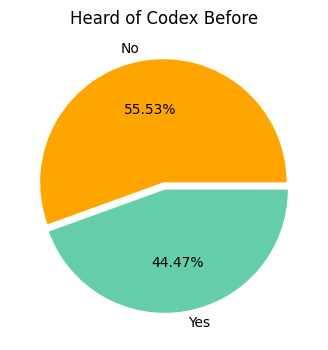

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(responses_df.Heard_before.value_counts(),
        labels=['No', 'Yes'],
        explode=[0.03]* 2,
        autopct='%.2f%%',
        colors=['orange','mediumaquamarine'])
plt.title('Heard of Codex Before')
plt.show()

In [ ]:
#percentage of people who prefer CodeX
percent_CodeX_consumer = responses_df[(responses_df.Current_brands=='CodeX')].Current_brands.value_counts()/10000 *100
percent_CodeX_consumer

CodeX    9.8
Name: Current_brands, dtype: float64

In [ ]:
#percentage of people who prefer Other brand
percent_Other_consumer = responses_df[~(responses_df.Current_brands=='CodeX')].Current_brands.value_counts().sum()/10000 *100
percent_Other_consumer

90.2

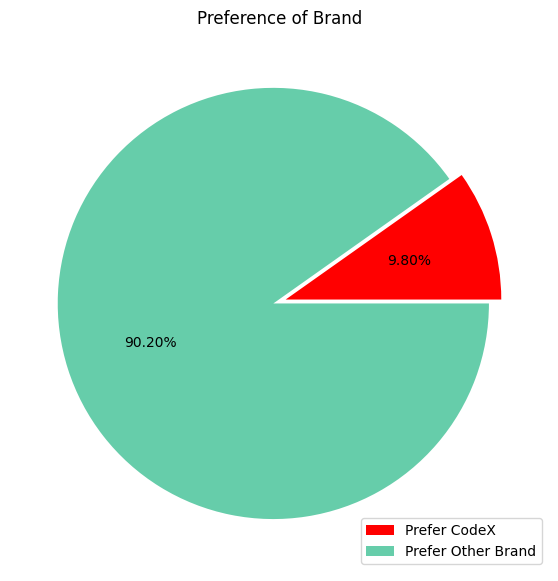

In [ ]:
plt.figure(figsize=(7,7))
plt.pie([percent_CodeX_consumer,percent_Other_consumer],
        explode=[0.03]* 2,
        autopct='%.2f%%',
        colors=['r','mediumaquamarine'])
plt.title('Preference of Brand')
plt.legend(labels=['Prefer CodeX', 'Prefer Other Brand'], loc='lower right')
plt.show()

# **5. Brand Penetration:**

**a. What do people think about our brand? (overall rating)**

In [ ]:
#rating from those who have actually tried the drink of Code X
overall_rating = responses_df[responses_df['Tried_before'] == 'Yes'].Taste_experience.value_counts().sort_index(ascending=True)
overall_rating

1     522
2     732
3    1474
4    1219
5     934
Name: Taste_experience, dtype: int64

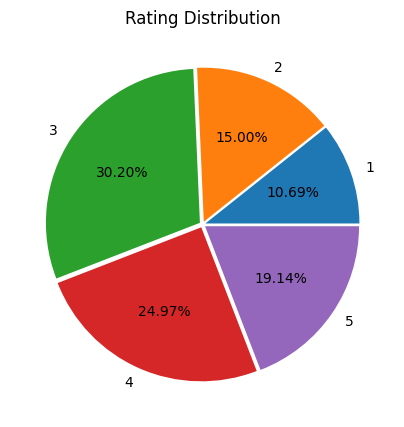

In [ ]:
plt.figure(figsize = (5,5))              #define figure size
plt.pie(x = overall_rating,
        labels = overall_rating.index,                 #show category labels
        explode=[0.02]* len(overall_rating),
        autopct='%.2f%%')
plt.title('Rating Distribution')
plt.show()

In [ ]:
overall_rating = overall_rating.reset_index()
overall_rating.columns = ['Taste_experience','Count']
overall_rating

,Taste_experience,Count
0,1,522
1,2,732
2,3,1474
3,4,1219
4,5,934


In [ ]:
overall_rating['total_rating'] = overall_rating.Taste_experience * overall_rating.Count

In [ ]:
overall_rating

,Taste_experience,Count,total_rating
0,1,522,522
1,2,732,1464
2,3,1474,4422
3,4,1219,4876
4,5,934,4670


In [ ]:
#overall rating from those who have tried the drink
overall_rating_ = overall_rating.total_rating.sum()/overall_rating.Count.sum()
round(overall_rating_,2)

3.27

Note : Overall rating is calculated for only those who have taseted CodeX

**b. Which cities do we need to focus more on?**

In [ ]:
df.City.value_counts()

Bangalore    2828
Hyderabad    1833
Mumbai       1510
Chennai       937
Pune          906
Kolkata       566
Ahmedabad     456
Delhi         429
Jaipur        360
Lucknow       175
Name: City, dtype: int64

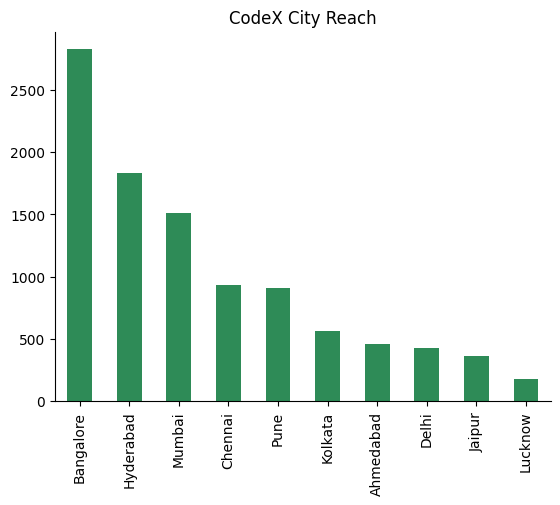

In [ ]:
df.City.value_counts().plot(kind='bar',color='seagreen')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('CodeX City Reach')
plt.show()

Tier 2 cities except Delhi need to be focused.

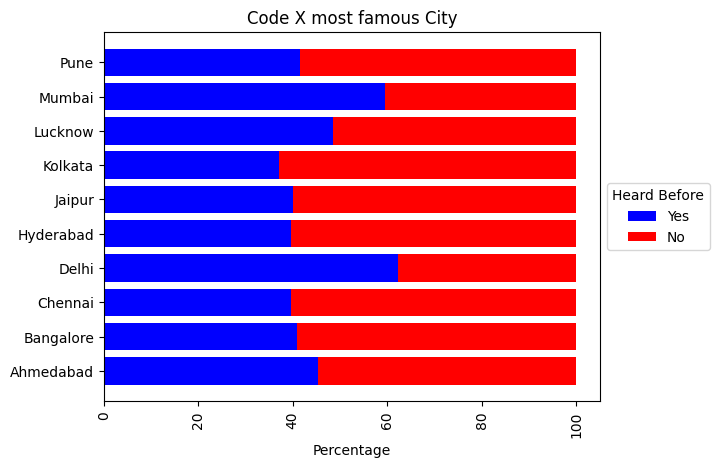

In [ ]:
# Plotting the stacked bars
plt.barh(t_city_count.index, t_city_count['Yes'], label='Yes', color='b')
plt.barh(t_city_count.index, t_city_count['No'], label='No', color='r', left=t_city_count['Yes'])
plt.legend(title='Heard Before', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.xlabel('Percentage')
plt.title('Code X most famous City')
plt.show()

# **6. Purchase Behavior:**

**a. Where do respondents prefer to purchase energy drinks?**

In [ ]:
df.Purchase_location.value_counts()

Supermarkets                4494
Online retailers            2550
Gyms and fitness centers    1464
Local stores                 813
Other                        679
Name: Purchase_location, dtype: int64

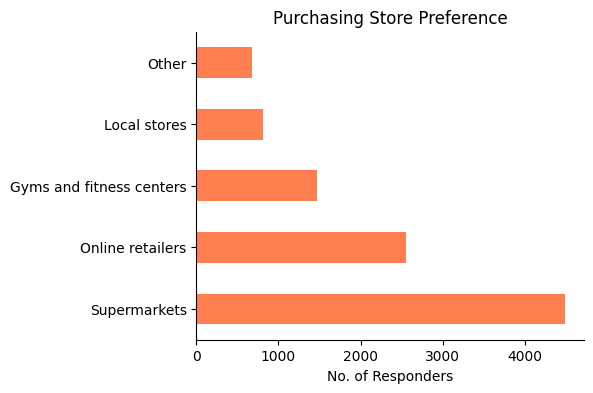

In [ ]:
plt.figure(figsize=(5,4))
df.Purchase_location.value_counts().plot(kind='barh', color='coral')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('No. of Responders')
plt.title('Purchasing Store Preference')
plt.show()

**b. What are the typical consumption situations for energy drinks among respondents?**

In [ ]:
df.Typical_consumption_situations.value_counts()

Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: Typical_consumption_situations, dtype: int64

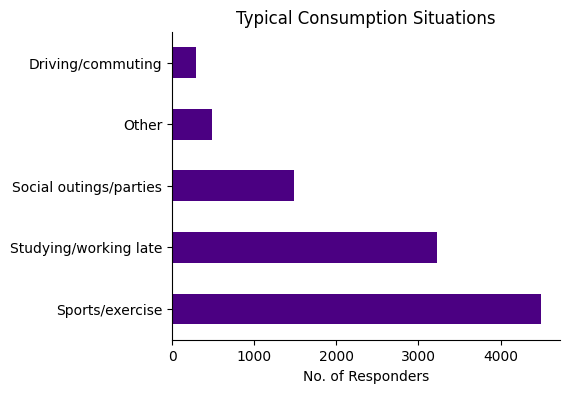

In [ ]:
plt.figure(figsize=(5,4))
df.Typical_consumption_situations.value_counts().plot(kind='barh', color='indigo')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('No. of Responders')
plt.title('Typical Consumption Situations')
plt.show()

**c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?**

In [ ]:
df.Price_range.value_counts()

50-99        4288
100-150      3142
Above 150    1561
Below 50     1009
Name: Price_range, dtype: int64

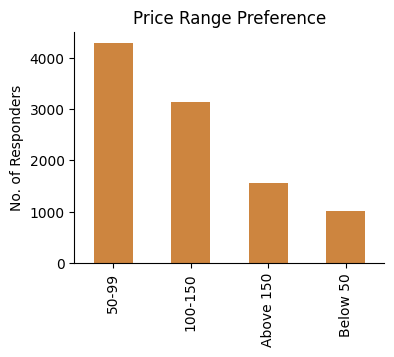

In [ ]:
plt.figure(figsize=(4,3))
df.Price_range.value_counts().plot(kind='bar', color='peru')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('No. of Responders')
plt.title('Price Range Preference')
plt.show()

In [ ]:
df.Limited_edition_packaging.value_counts()

No          4023
Yes         3946
Not Sure    2031
Name: Limited_edition_packaging, dtype: int64

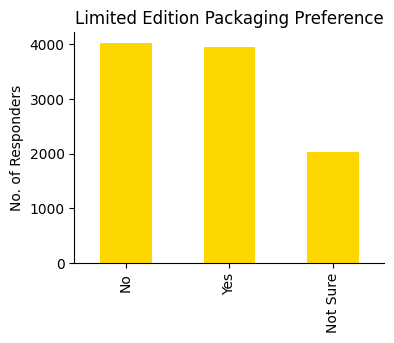

In [ ]:
plt.figure(figsize=(4,3))
df.Limited_edition_packaging.value_counts().plot(kind='bar', color='gold')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('No. of Responders')
plt.title('Limited Edition Packaging Preference')
plt.show()

In [ ]:
df.Consume_reason.value_counts()

Increased energy and focus       3574
To combat fatigue                2428
To enhance sports performance    1604
To boost performance             1514
Other                             880
Name: Consume_reason, dtype: int64

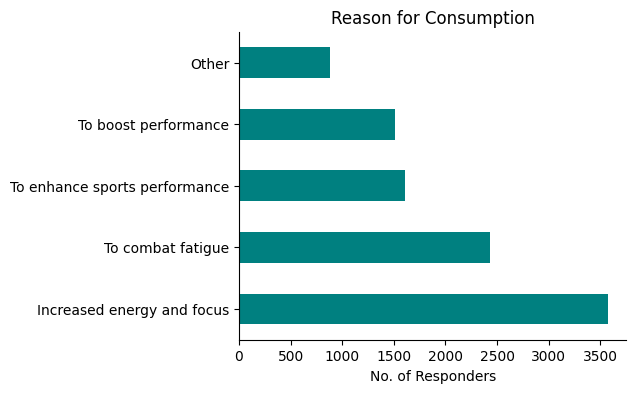

In [ ]:
plt.figure(figsize=(5,4))
df.Consume_reason.value_counts().plot(kind='barh', color='teal')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('No. of Responders')
plt.title('Reason for Consumption')
plt.show()

# **7. Product Development**

**a. Which area of business should we focus more on our product development? (Branding/taste/availability)**

In [ ]:
df.head(2)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2


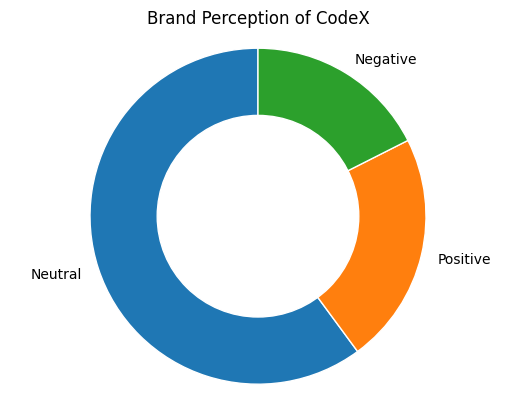

In [ ]:
plt.pie(df[df.Current_brands == 'CodeX'].Brand_perception.value_counts(),
        labels=df[df.Current_brands == 'CodeX'].Brand_perception.value_counts().index,
        wedgeprops={'edgecolor': 'white'},
        startangle=90)
plt.title('Brand Perception of CodeX')
center_circle = plt.Circle((0, 0), 0.6, color='white')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
# Equal aspect ratio ensures circular shape
plt.axis('equal')
plt.show()

In [ ]:
df.Reasons_preventing_trying.value_counts()

Not available locally              2431
Health concerns                    2258
Not interested in energy drinks    2193
Unfamiliar with the brand          1850
Other                              1268
Name: Reasons_preventing_trying, dtype: int64

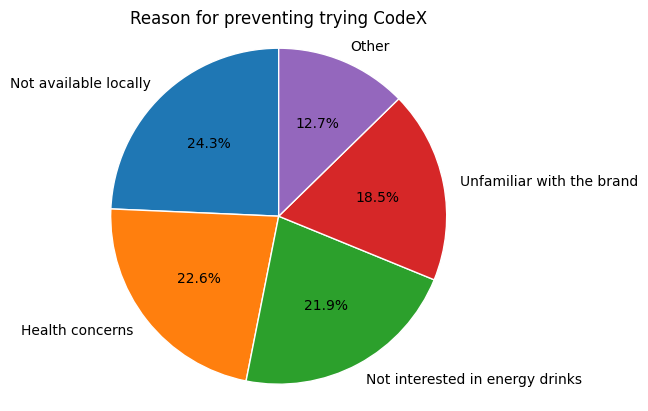

In [ ]:
plt.pie(df.Reasons_preventing_trying.value_counts(),
        labels=df.Reasons_preventing_trying.value_counts().index,
        wedgeprops={'edgecolor': 'white'},
         autopct='%1.1f%%',
        startangle=90)
plt.title('Reason for preventing trying CodeX')
plt.axis('equal')
plt.show()

Overall Rating : 2.26

**Secondary Insights**

**Is there a correlation between energy drink consumption and health-related factors, such as exercise habits or sleep patterns?**

In [ ]:
df.Consume_time.value_counts()

To stay awake during work/study    3409
Before exercise                    3148
For mental alertness               1995
Throughout the day                 1448
Name: Consume_time, dtype: int64

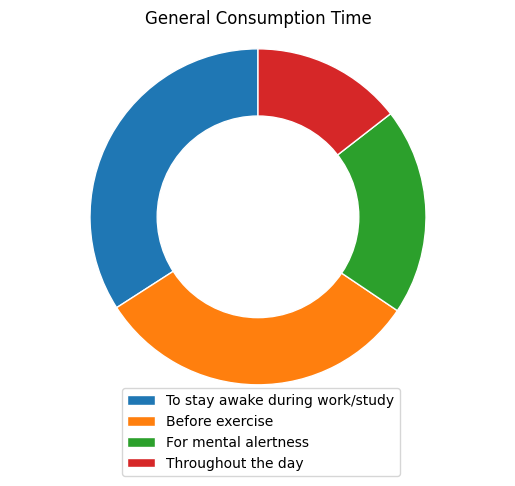

In [ ]:
plt.pie(df.Consume_time.value_counts(),
        # labels=df.Consume_time.value_counts().index,
        wedgeprops={'edgecolor': 'white'},
        startangle=90)
plt.title('General Consumption Time')
center_circle = plt.Circle((0, 0), 0.6, color='white')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
#add legend
plt.legend(df.Consume_time.value_counts().index, loc='lower right',bbox_to_anchor=(0.8, -0.22))
# Equal aspect ratio ensures circular shape
plt.axis('equal')
plt.show()

In [ ]:
df.Health_concerns.value_counts()

Yes    6045
No     3955
Name: Health_concerns, dtype: int64

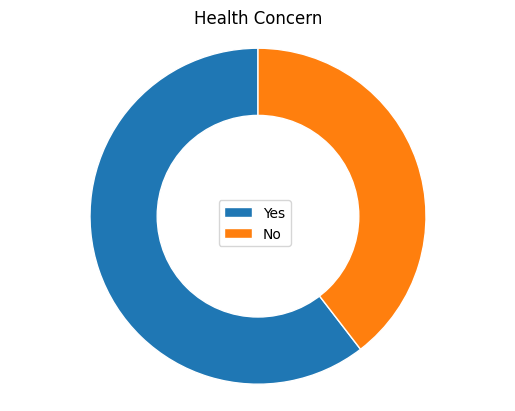

In [ ]:
plt.pie(df.Health_concerns.value_counts(),
        # labels=df.Consume_time.value_counts().index,
        wedgeprops={'edgecolor': 'white'},
        startangle=90)
plt.title('Health Concern')
center_circle = plt.Circle((0, 0), 0.6, color='white')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
#add legend
plt.legend(df.Health_concerns.value_counts().index, loc='lower right',bbox_to_anchor=(0.58, 0.4))
# Equal aspect ratio ensures circular shape
plt.axis('equal')
plt.show()

In [ ]:
df.Interest_in_natural_or_organic.value_counts()

Yes         4983
No          3062
Not Sure    1955
Name: Interest_in_natural_or_organic, dtype: int64

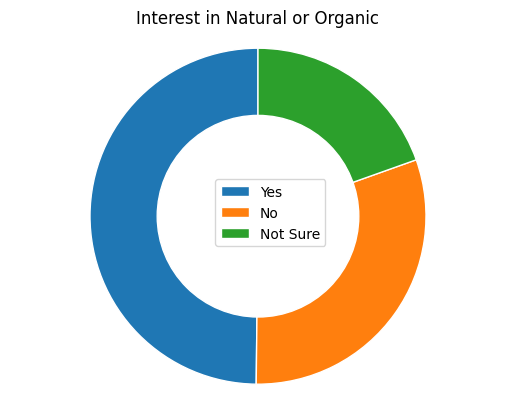

In [ ]:
plt.pie(df.Interest_in_natural_or_organic.value_counts(),
        wedgeprops={'edgecolor': 'white'},
        startangle=90)
plt.title('Interest in Natural or Organic')
center_circle = plt.Circle((0, 0), 0.6, color='white')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
#add legend
plt.legend(df.Interest_in_natural_or_organic.value_counts().index, loc='lower right',bbox_to_anchor=(0.65, 0.4))
# Equal aspect ratio ensures circular shape
plt.axis('equal')
plt.show()

**How often people consume energy drink?**

In [ ]:
df.Consume_frequency.value_counts()

2-3 times a week     3491
Rarely               1941
2-3 times a month    1613
Once a week          1609
Daily                1346
Name: Consume_frequency, dtype: int64

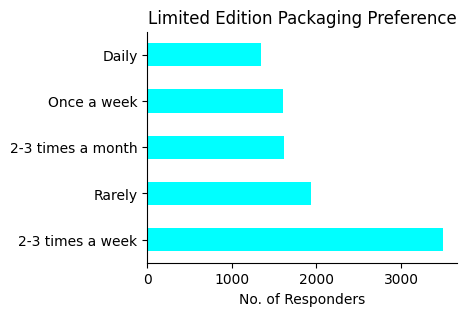

In [ ]:
plt.figure(figsize=(4,3))
df.Consume_frequency.value_counts().plot(kind='barh', color='cyan')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('No. of Responders')
plt.title('Limited Edition Packaging Preference')
plt.show()